## Importing & Cleaning

In [1]:
import pandas as pd

df = pd.read_csv(r"D:\Excel Project\Pending Projects\C9_Input_Files\C9_Input_Files\dataset\fact_events.csv")
df1 = pd.read_csv(r"D:\Excel Project\Pending Projects\C9_Input_Files\C9_Input_Files\dataset\dim_stores.csv")
df2 = pd.read_csv(r"D:\Excel Project\Pending Projects\C9_Input_Files\C9_Input_Files\dataset\dim_products.csv")
df3 = pd.read_csv(r"D:\Excel Project\Pending Projects\C9_Input_Files\C9_Input_Files\dataset\dim_campaigns.csv")

df

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo)
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,85
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93
...,...,...,...,...,...,...,...,...
1495,1e8961,STBLR-3,CAMP_SAN_01,P12,62,50% OFF,61,84
1496,f957f1,STMDU-1,CAMP_SAN_01,P10,50,25% OFF,22,18
1497,a9ae21,STCBE-0,CAMP_DIW_01,P12,62,50% OFF,80,119
1498,e5d28d,STVSK-0,CAMP_SAN_01,P13,350,BOGOF,73,282


In [2]:
df = pd.merge(df, df1, on='store_id', how='left')
df = pd.merge(df, df3, on='campaign_id', how='left')
df = pd.merge(df, df2, on='product_code', how='left')
df

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),city,campaign_name,start_date,end_date,product_name,category
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52,Coimbatore,Sankranti,10-01-2024,16-01-2024,Atliq_Doodh_Kesar_Body_Lotion (200ML),Personal Care
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322,Bengaluru,Diwali,12-11-2023,18-11-2023,Atliq_Suflower_Oil (1L),Grocery & Staples
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,85,Vijayawada,Sankranti,10-01-2024,16-01-2024,Atliq_Curtains,Home Care
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000,Coimbatore,Diwali,12-11-2023,18-11-2023,Atliq_Home_Essential_8_Product_Combo,Combo1
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93,Bengaluru,Diwali,12-11-2023,18-11-2023,Atliq_Scrub_Sponge_For_Dishwash,Home Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1e8961,STBLR-3,CAMP_SAN_01,P12,62,50% OFF,61,84,Bengaluru,Sankranti,10-01-2024,16-01-2024,Atliq_Lime_Cool_Bathing_Bar (125GM),Personal Care
1496,f957f1,STMDU-1,CAMP_SAN_01,P10,50,25% OFF,22,18,Madurai,Sankranti,10-01-2024,16-01-2024,Atliq_Cream_Beauty_Bathing_Soap (125GM),Personal Care
1497,a9ae21,STCBE-0,CAMP_DIW_01,P12,62,50% OFF,80,119,Coimbatore,Diwali,12-11-2023,18-11-2023,Atliq_Lime_Cool_Bathing_Bar (125GM),Personal Care
1498,e5d28d,STVSK-0,CAMP_SAN_01,P13,350,BOGOF,73,282,Visakhapatnam,Sankranti,10-01-2024,16-01-2024,Atliq_High_Glo_15W_LED_Bulb,Home Appliances


In [3]:
promo_dummies = pd.get_dummies(df['promo_type'], prefix='promotion')
store_dummies = pd.get_dummies(df['store_id'], prefix='store')

# Concatenate the dummy variables with the original DataFrame
f = pd.concat([df, promo_dummies, store_dummies], axis=1)

## Store Performance Analysis :

### Which are the top 10 stores in terms of Incremental Revenue (IR) generated from the promotions?

c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


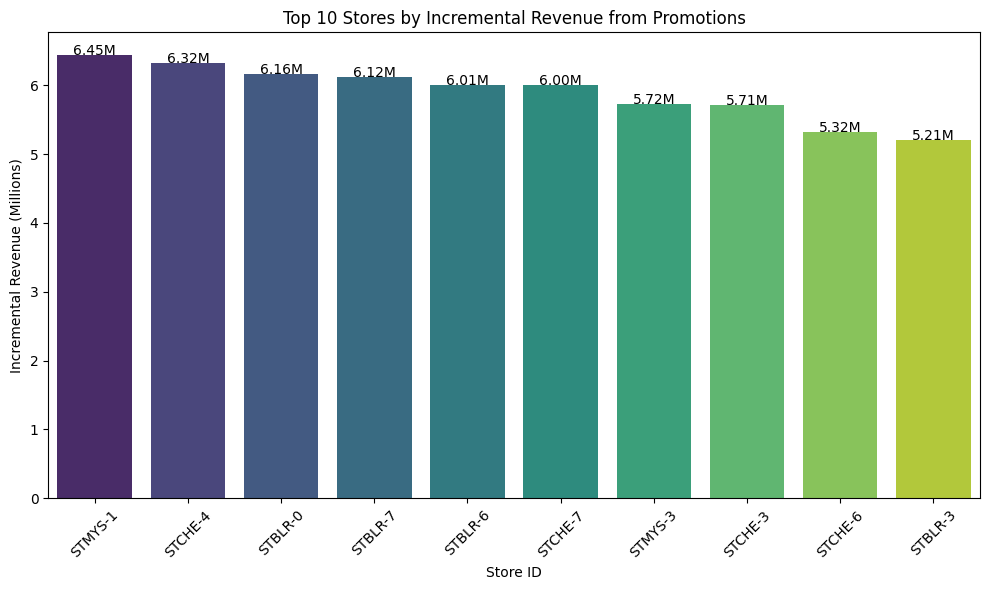

In [4]:
# Assuming you have the necessary data loaded in a DataFrame called 'df'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate revenue before promotion
revenue_before_promo = df['quantity_sold(before_promo)'] * df['base_price']

# Calculate revenue after promotion
revenue_after_promo = df['quantity_sold(after_promo)'] * df['base_price']

# Calculate Incremental Revenue (IR)
incremental_revenue = revenue_after_promo - revenue_before_promo

# Add Incremental Revenue (IR) column to DataFrame
df['incremental_revenue'] = incremental_revenue

# Group by store and sum the Incremental Revenue
top_stores = df.groupby('store_id')['incremental_revenue'].sum().nlargest(10)

# Convert revenue to millions for better readability
top_stores_millions = top_stores / 1000000  # Convert to millions

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_stores_millions.index, y=top_stores_millions.values, palette="viridis")
plt.ylabel('Incremental Revenue (Millions)')
plt.xlabel('Store ID')
plt.title('Top 10 Stores by Incremental Revenue from Promotions')
plt.xticks(rotation=45)

# Adding labels to the bars
for i, v in enumerate(top_stores_millions):
    plt.text(i, v, f'{v:.2f}M', color='black', ha='center')

plt.tight_layout()
plt.show()


### Which are the bottom 10 stores when it comes to Incremental Sold Units (ISU) during the promotional period?

c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


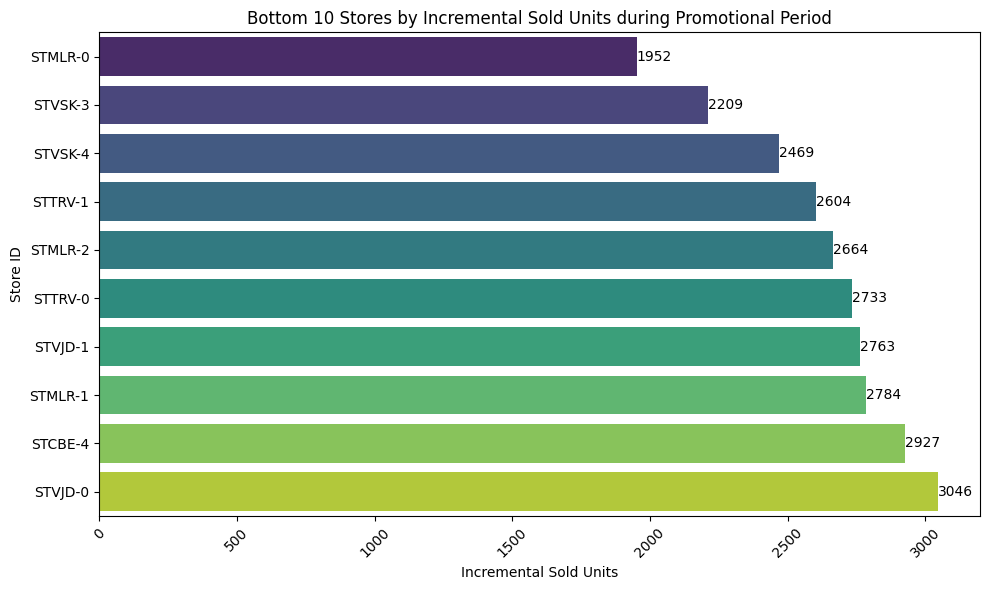

In [5]:
# Calculate Incremental Sold Units (ISU) for each store
df['incremental_sold_units'] = df['quantity_sold(after_promo)'] - df['quantity_sold(before_promo)']

# Group by store and sum the Incremental Sold Units
bottom_stores = df.groupby('store_id')['incremental_sold_units'].sum().nsmallest(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_stores.values, y=bottom_stores.index, palette="viridis")
plt.xlabel('Incremental Sold Units')
plt.ylabel('Store ID')
plt.title('Bottom 10 Stores by Incremental Sold Units during Promotional Period')
plt.xticks(rotation=45)

# Adding labels to the bars
for i, v in enumerate(bottom_stores):
    plt.text(v, i, f'{v}', color='black', va='center')

plt.tight_layout()
plt.show()


c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


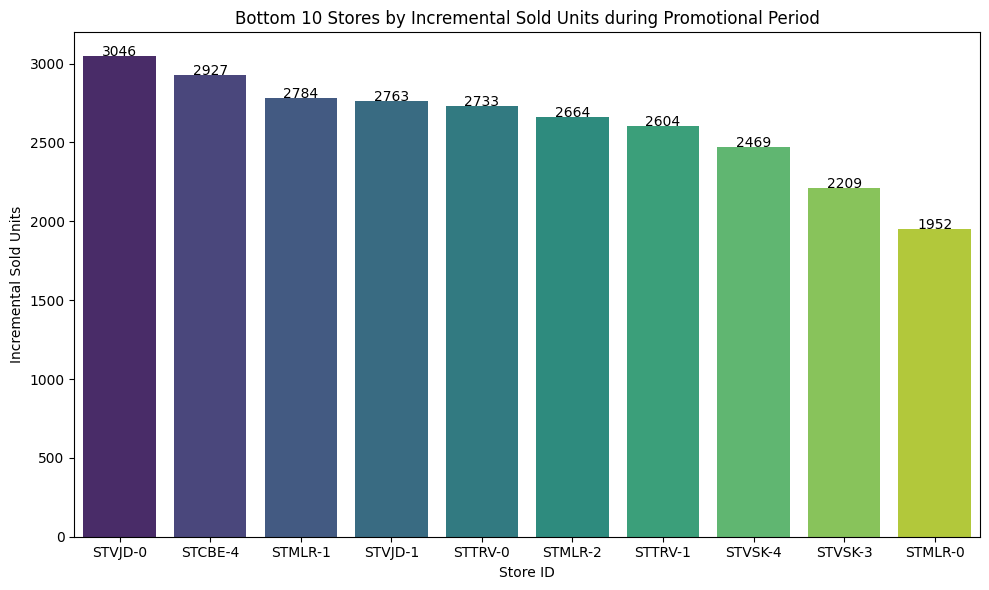

In [6]:
# Sort bottom stores by incremental sold units in ascending order
bottom_stores_sorted = bottom_stores.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_stores_sorted.index, y=bottom_stores_sorted.values, palette="viridis")
plt.ylabel('Incremental Sold Units')
plt.xlabel('Store ID')
plt.title('Bottom 10 Stores by Incremental Sold Units during Promotional Period')

# Adding labels to the bars
for i, v in enumerate(bottom_stores_sorted):
    plt.text(i, v, f'{v}', color='black', ha='center')

plt.tight_layout()
plt.show()


### How does the performance of stores vary by city? 

c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

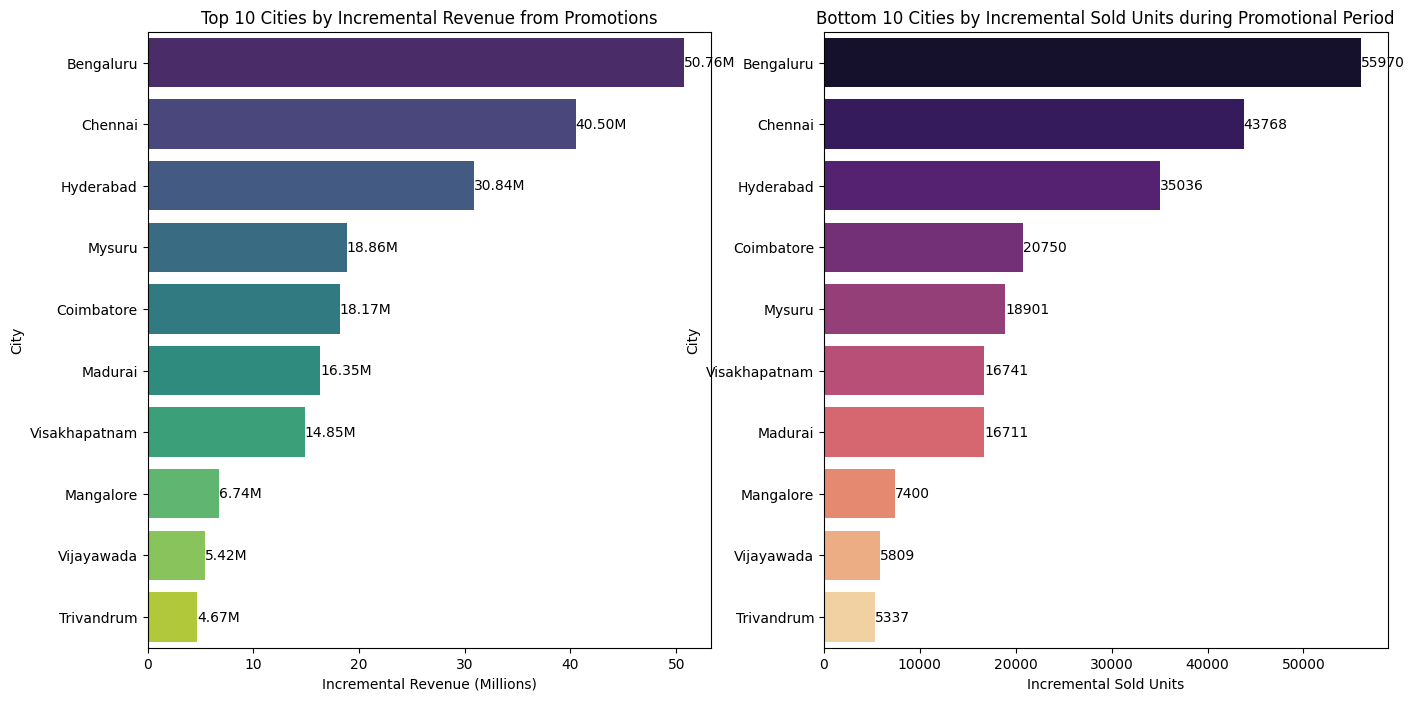

In [7]:
# Calculate Incremental Revenue (IR) for each store
df['incremental_revenue'] = (df['quantity_sold(after_promo)'] - df['quantity_sold(before_promo)']) * df['base_price']
df['incremental_revenue_per_unit'] = df['incremental_revenue'] / df['incremental_sold_units']

# Group by city and sum the Incremental Revenue (IR)
top_cities_ir = df.groupby('city')['incremental_revenue'].sum().nlargest(10) / 1000000  # Convert to millions

# Group by city and sum the Incremental Sold Units (ISU)
bottom_cities_isu = df.groupby('city')['incremental_sold_units'].sum().nsmallest(10)

# Plotting
plt.figure(figsize=(16, 8))

# Plot top 10 cities by Incremental Revenue (IR)
plt.subplot(1, 2, 1)
sns.barplot(x=top_cities_ir.values, y=top_cities_ir.index, palette="viridis")
plt.xlabel('Incremental Revenue (Millions)')
plt.ylabel('City')
plt.title('Top 10 Cities by Incremental Revenue from Promotions')

# Adding labels to the bars for Incremental Revenue (IR)
for i, v in enumerate(top_cities_ir):
    plt.text(v, i, f'{v:.2f}M', color='black', va='center')

# Plot bottom 10 cities by Incremental Sold Units (ISU) - sorted in descending order
plt.subplot(1, 2, 2)
bottom_cities_isu_sorted = bottom_cities_isu.sort_values(ascending=False)
sns.barplot(x=bottom_cities_isu_sorted.values, y=bottom_cities_isu_sorted.index, palette="magma")
plt.xlabel('Incremental Sold Units')
plt.ylabel('City')
plt.title('Bottom 10 Cities by Incremental Sold Units during Promotional Period')

# Adding labels to the bars for Incremental Sold Units (ISU)
for i, v in enumerate(bottom_cities_isu_sorted):
    plt.text(v, i, f'{v}', color='black', va='center')



### Are there any common characteristics among the top-performing stores that could be leveraged across other stores?

In [8]:
import pandas as pd

df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Calculate the total days and create a new column named 'total_days'
df['total_days'] = (df['start_date'] - df['end_date']).dt.days
df['revenue_before_promotion'] = df['base_price'] * df['quantity_sold(before_promo)']
df['revenue_after_promotion'] = df['base_price'] * df['quantity_sold(after_promo)']

# Calculate Incremental Revenue Percentage
df['incremental_revenue_percentage'] = ((df['revenue_after_promotion'] - df['revenue_before_promotion']) / df['revenue_before_promotion']) * 100
# Select the columns you want to include in DataFrame "f"
columns_list = ['base_price', 'quantity_sold(before_promo)', 'quantity_sold(after_promo)',
                'incremental_revenue','incremental_revenue_per_unit' ,'incremental_sold_units', 'incremental_revenue_percentage','total_days', 'category', 'promo_type', 'city', 'campaign_name']

# Create new DataFrame "f" with selected columns
f = df[columns_list].copy()

# Convert categorical columns into dummy variables
categorical_columns = ['category', 'promo_type', 'city', 'campaign_name']

# Convert categorical columns into dummy variables and add to DataFrame "f"
f = pd.get_dummies(f, columns=categorical_columns)
f = f.astype(int)

# Now, DataFrame "f" contains the selected columns from DataFrame "df" with categorical columns converted into dummy variables
f

C:\Users\j\AppData\Local\Temp\ipykernel_11136\77859601.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['end_date'] = pd.to_datetime(df['end_date'])


,base_price,quantity_sold(before_promo),quantity_sold(after_promo),incremental_revenue,incremental_revenue_per_unit,incremental_sold_units,incremental_revenue_percentage,total_days,category_Combo1,category_Grocery & Staples,...,city_Coimbatore,city_Hyderabad,city_Madurai,city_Mangalore,city_Mysuru,city_Trivandrum,city_Vijayawada,city_Visakhapatnam,campaign_name_Diwali,campaign_name_Sankranti
0,190,34,52,3420,190,18,52,259,0,0,...,1,0,0,0,0,0,0,0,0,1
1,156,393,322,-11076,156,-71,-18,23,0,1,...,0,0,0,0,0,0,0,0,1,0
2,300,22,85,18900,300,63,286,259,0,0,...,0,0,0,0,0,0,1,0,0,1
3,3000,329,1000,2013000,3000,671,203,23,1,0,...,1,0,0,0,0,0,0,0,1,0
4,55,108,93,-825,55,-15,-13,23,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,62,61,84,1426,62,23,37,259,0,0,...,0,0,0,0,0,0,0,0,0,1
1496,50,22,18,-200,50,-4,-18,259,0,0,...,0,0,1,0,0,0,0,0,0,1
1497,62,80,119,2418,62,39,48,23,0,0,...,1,0,0,0,0,0,0,0,1,0
1498,350,73,282,73150,350,209,286,259,0,0,...,0,0,0,0,0,0,0,1,0,1


In [9]:
f.info()
#base_price
#incremental_revenue_per_unit 
#total_days
#category 
#promo_type
#city
#campaign_name                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   base_price                      1500 non-null   int32
 1   quantity_sold(before_promo)     1500 non-null   int32
 2   quantity_sold(after_promo)      1500 non-null   int32
 3   incremental_revenue             1500 non-null   int32
 4   incremental_revenue_per_unit    1500 non-null   int32
 5   incremental_sold_units          1500 non-null   int32
 6   incremental_revenue_percentage  1500 non-null   int32
 7   total_days                      1500 non-null   int32
 8   category_Combo1                 1500 non-null   int32
 9   category_Grocery & Staples      1500 non-null   int32
 10  category_Home Appliances        1500 non-null   int32
 11  category_Home Care              1500 non-null   int32
 12  category_Personal Care          1500 non-null   int32
 13  pro

In [10]:
# Find top 10 stores with highest incremental_revenue_per_unit
s10 = df.nlargest(10, 'incremental_revenue_per_unit')

# Now, top_10_stores contains the top 10 stores with highest incremental_revenue_per_unit
s10

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),city,campaign_name,...,end_date,product_name,category,incremental_revenue,incremental_sold_units,incremental_revenue_per_unit,total_days,revenue_before_promotion,revenue_after_promotion,incremental_revenue_percentage
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000,Coimbatore,Diwali,...,2023-11-18,Atliq_Home_Essential_8_Product_Combo,Combo1,2013000,671,3000.0,23,987000,3000000,203.951368
11,8f25a6,STHYD-6,CAMP_SAN_01,P15,3000,500 Cashback,126,302,Hyderabad,Sankranti,...,2024-01-16,Atliq_Home_Essential_8_Product_Combo,Combo1,528000,176,3000.0,259,378000,906000,139.682540
26,ca7298,STCBE-2,CAMP_SAN_01,P15,3000,500 Cashback,85,228,Coimbatore,Sankranti,...,2024-01-16,Atliq_Home_Essential_8_Product_Combo,Combo1,429000,143,3000.0,259,255000,684000,168.235294
41,eb3bea,STVSK-2,CAMP_SAN_01,P15,3000,500 Cashback,109,238,Visakhapatnam,Sankranti,...,2024-01-16,Atliq_Home_Essential_8_Product_Combo,Combo1,387000,129,3000.0,259,327000,714000,118.348624
64,c8ce63,STMDU-0,CAMP_DIW_01,P15,3000,500 Cashback,369,1221,Madurai,Diwali,...,2023-11-18,Atliq_Home_Essential_8_Product_Combo,Combo1,2556000,852,3000.0,23,1107000,3663000,230.894309
70,70e65e,STCBE-0,CAMP_DIW_01,P15,3000,500 Cashback,320,937,Coimbatore,Diwali,...,2023-11-18,Atliq_Home_Essential_8_Product_Combo,Combo1,1851000,617,3000.0,23,960000,2811000,192.812500
92,268ca2,STVJD-0,CAMP_SAN_01,P15,3000,500 Cashback,63,151,Vijayawada,Sankranti,...,2024-01-16,Atliq_Home_Essential_8_Product_Combo,Combo1,264000,88,3000.0,259,189000,453000,139.682540
96,1548f8,STVSK-4,CAMP_SAN_01,P15,3000,500 Cashback,100,175,Visakhapatnam,Sankranti,...,2024-01-16,Atliq_Home_Essential_8_Product_Combo,Combo1,225000,75,3000.0,259,300000,525000,75.000000
99,873333,STMLR-0,CAMP_DIW_01,P15,3000,500 Cashback,196,509,Mangalore,Diwali,...,2023-11-18,Atliq_Home_Essential_8_Product_Combo,Combo1,939000,313,3000.0,23,588000,1527000,159.693878
101,f856b9,STMLR-2,CAMP_SAN_01,P15,3000,500 Cashback,66,147,Mangalore,Sankranti,...,2024-01-16,Atliq_Home_Essential_8_Product_Combo,Combo1,243000,81,3000.0,259,198000,441000,122.727273


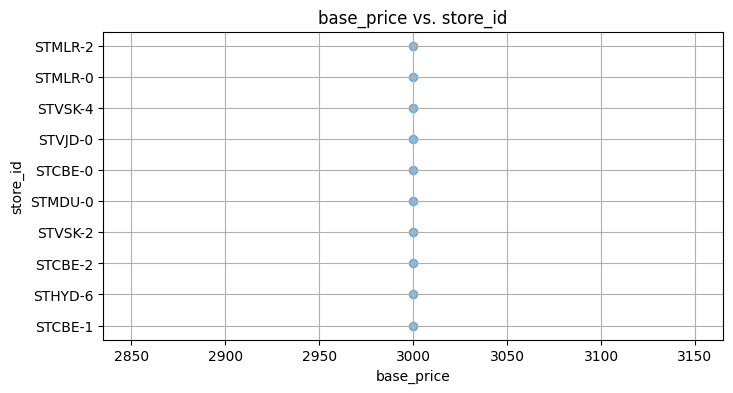

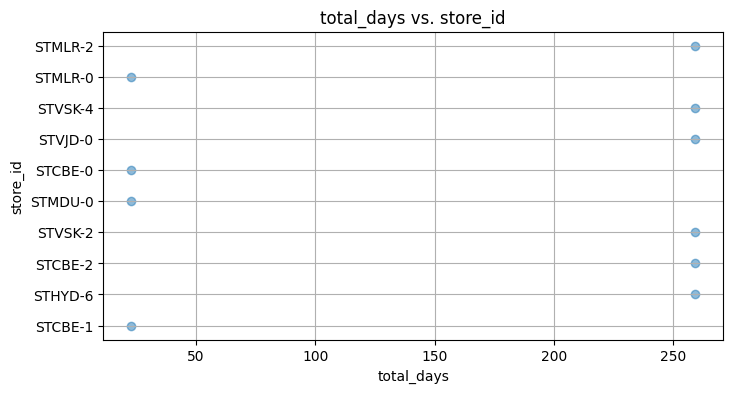

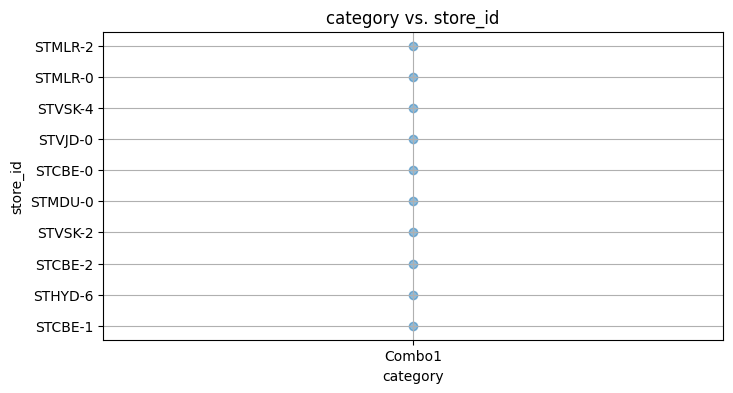

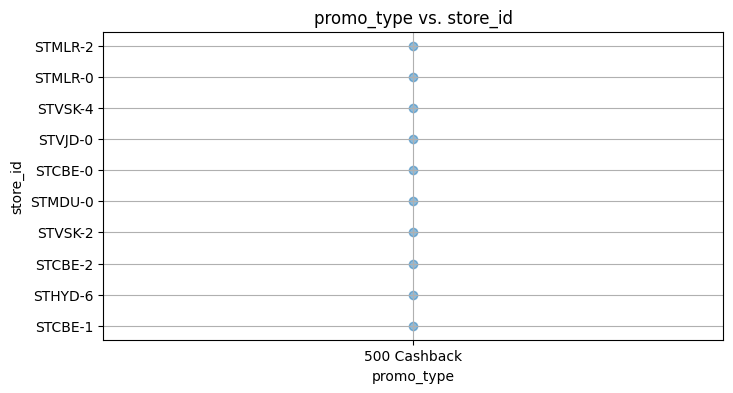

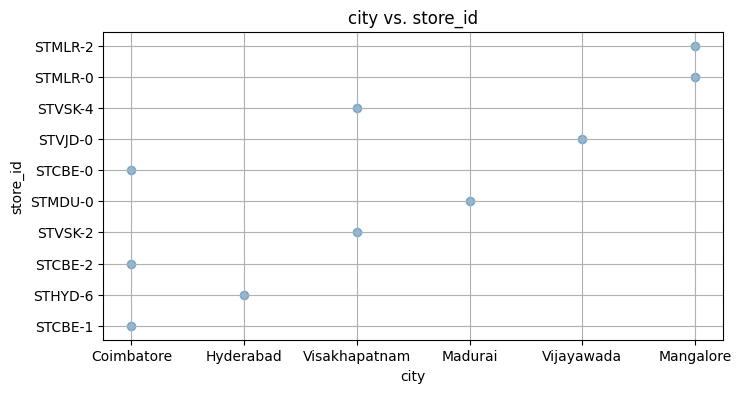

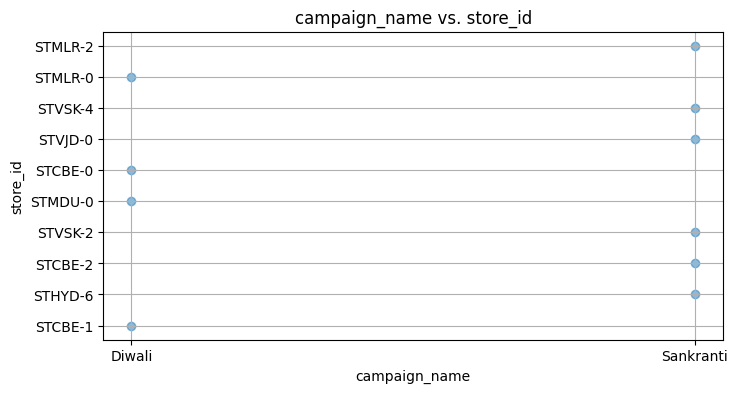

In [11]:
import matplotlib.pyplot as plt

# Ensure s10 DataFrame contains the required columns

# Plot graphs for each feature against store_id
features = ['base_price', 'total_days', 'category', 'promo_type', 'city', 'campaign_name']

for feature in features:
    plt.figure(figsize=(8, 4))
    plt.scatter(s10[feature], s10['store_id'], alpha=0.5)
    plt.title(f'{feature} vs. store_id')
    plt.xlabel(feature)
    plt.ylabel('store_id')
    plt.grid(True)
    plt.show()


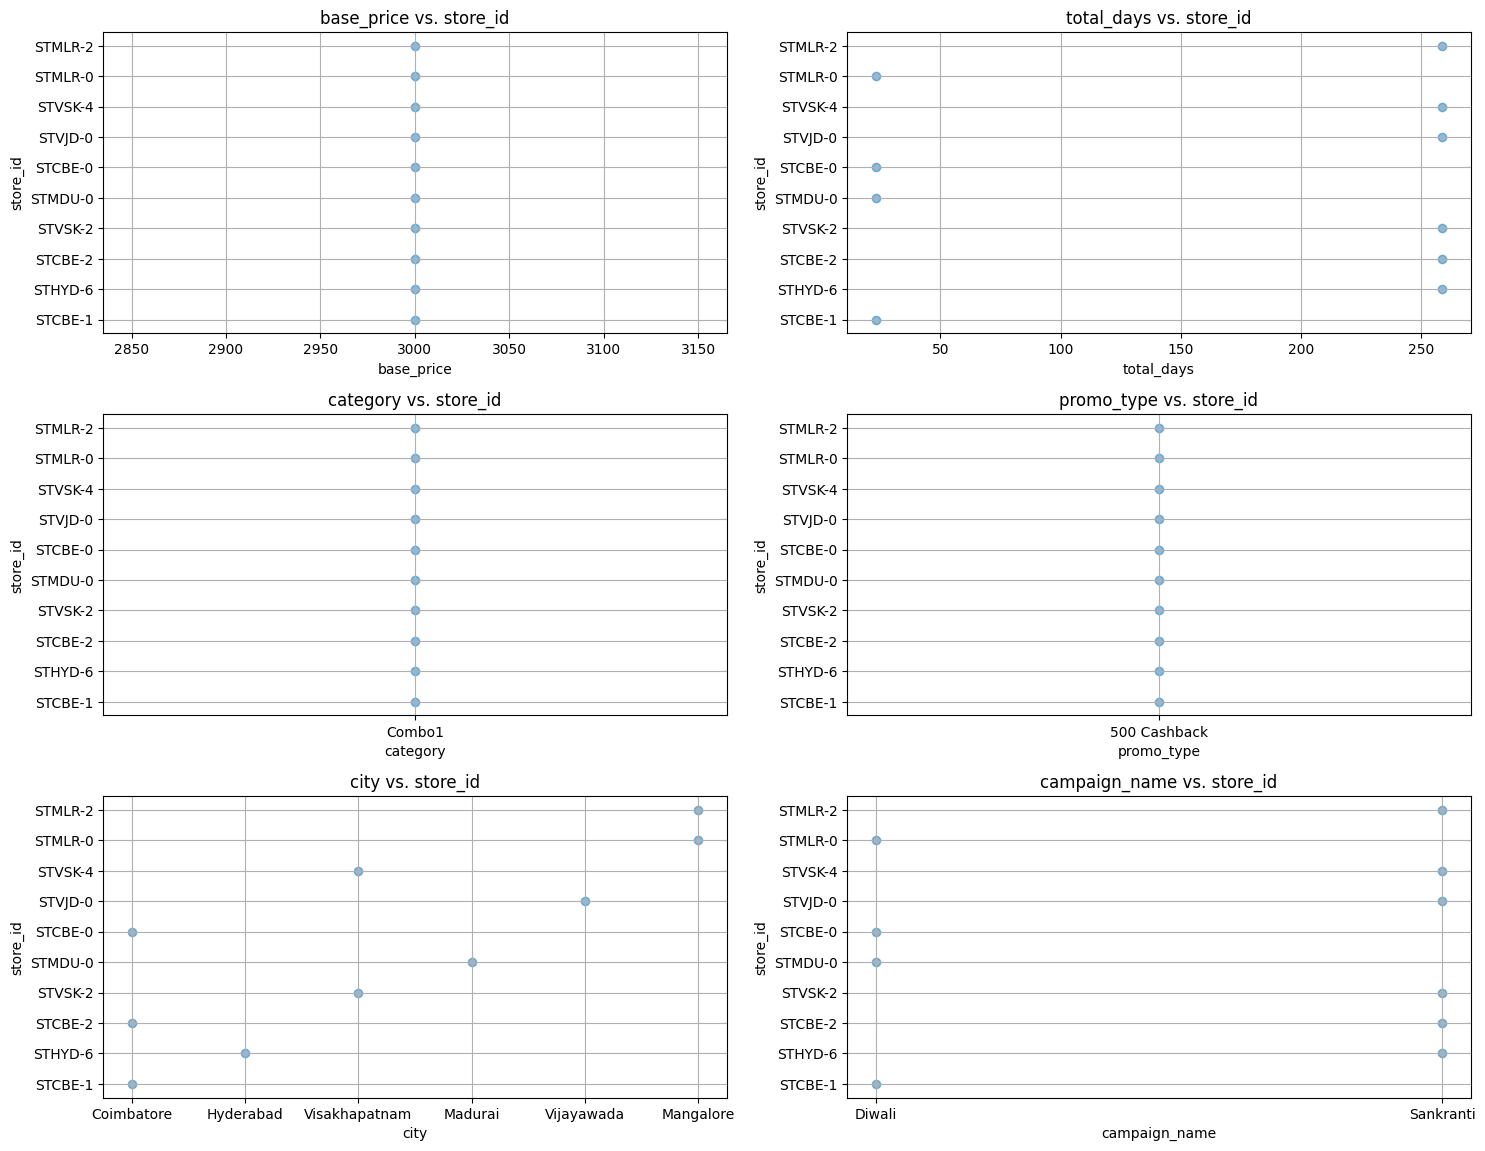

In [12]:
import matplotlib.pyplot as plt

# Ensure s10 DataFrame contains the required columns

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 2

# Create a figure and subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot graphs for each feature against store_id
features = ['base_price', 'total_days', 'category', 'promo_type', 'city', 'campaign_name']

for i, feature in enumerate(features):
    axs[i].scatter(s10[feature], s10['store_id'], alpha=0.5)
    axs[i].set_title(f'{feature} vs. store_id')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('store_id')
    axs[i].grid(True)

# Hide any remaining subplots
for j in range(len(features), num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


## Promotion Type Analysis :

### What are the top 2 promotion types that resulted in the highest Incremental Revenue?

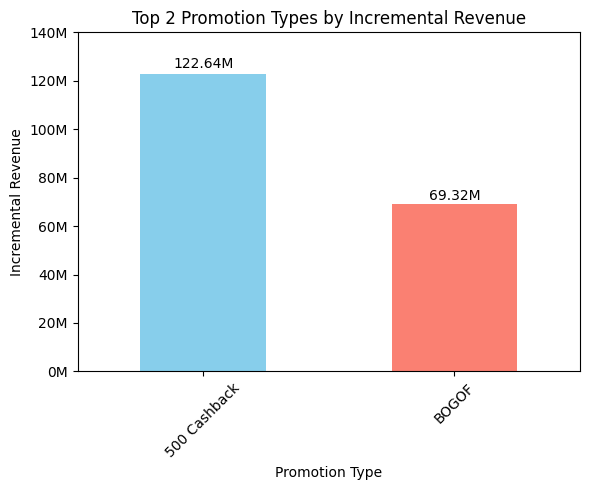

In [13]:

promotion_revenue = df.groupby('promo_type')['incremental_revenue'].sum().nlargest(2)
# Plotting
plt.figure(figsize=(6, 5))
ax = promotion_revenue.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Promotion Type')
plt.ylabel('Incremental Revenue')
plt.title('Top 2 Promotion Types by Incremental Revenue')

# Formatting y-axis tick labels to display values in millions
plt.yticks(ticks=ax.get_yticks(), labels=[f'{int(y)}M' for y in ax.get_yticks()/1000000])

# Adding value labels on top of each bar
for i, v in enumerate(promotion_revenue):
    plt.text(i, v + 0.02 * v, f'{v/1000000:.2f}M', ha='center', color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### What are the bottom 2 promotion types in terms of their impact on Incremental Sold Units?

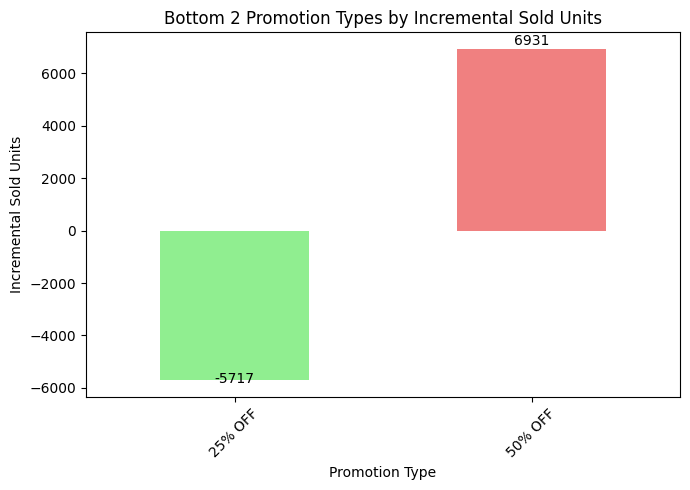

In [14]:
# Group by promotion type and sum the Incremental Sold Units
promotion_units = df.groupby('promo_type')['incremental_sold_units'].sum().nsmallest(2)

# Plotting
plt.figure(figsize=(7, 5))
promotion_units.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.xlabel('Promotion Type')
plt.ylabel('Incremental Sold Units')
plt.title('Bottom 2 Promotion Types by Incremental Sold Units')

# Adding value labels on top of each bar
for i, v in enumerate(promotion_units):
    plt.text(i, v + 0.02 * v, f'{v}', ha='center', color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Is there a significant difference in the performance of discount-based promotions versus BOGOF (Buy One Get One Free) or cashback promotions?

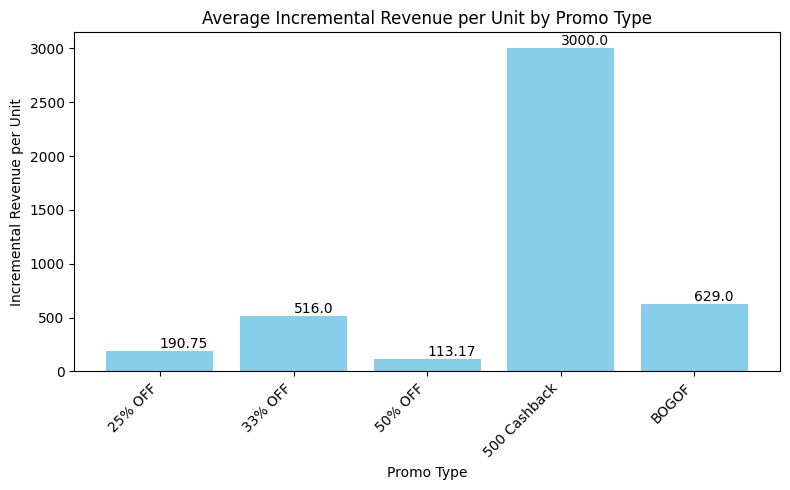

In [15]:
import matplotlib.pyplot as plt

# Calculate Incremental Revenue per Unit


# Group the DataFrame by promo_type and calculate the mean incremental revenue per unit for each promo_type
promo_revenue_per_unit = df.groupby('promo_type')['incremental_revenue_per_unit'].mean().reset_index()

# Plotting the graph
plt.figure(figsize=(8, 5))
bars = plt.bar(promo_revenue_per_unit['promo_type'], promo_revenue_per_unit['incremental_revenue_per_unit'], color='skyblue')

# Add labels for each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.xlabel('Promo Type')
plt.ylabel('Incremental Revenue per Unit')
plt.title('Average Incremental Revenue per Unit by Promo Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Which promotions strike the best balance between Incremental Sold Units and maintaining healthy margins?

c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

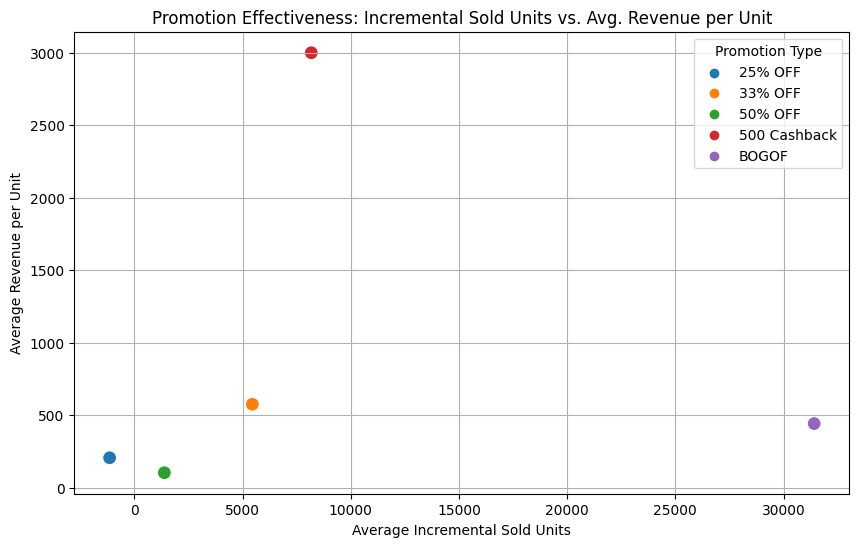

In [16]:
# Calculate total incremental revenue and total incremental sold units for each promotion type
promotion_data = df.groupby('promo_type').agg({
    'incremental_revenue': 'sum',
    'incremental_sold_units': 'sum'
}).reset_index()

# Calculate average incremental revenue per unit for each promotion type
promotion_data['avg_revenue_per_unit'] = promotion_data['incremental_revenue'] / promotion_data['incremental_sold_units']
promotion_data['avg_sold_units'] = promotion_data['incremental_sold_units'] / len(df['promo_type'].unique())

# Visualize the relationship between incremental sold units and incremental revenue per unit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=promotion_data, x='avg_sold_units', y='avg_revenue_per_unit', hue='promo_type', s=100)
plt.title('Promotion Effectiveness: Incremental Sold Units vs. Avg. Revenue per Unit')
plt.xlabel('Average Incremental Sold Units')
plt.ylabel('Average Revenue per Unit')
plt.grid(True)
plt.legend(title='Promotion Type')
plt.show()


## Product and Category Analysis :

### Which product categories saw the most significant lift in sales from the promotions?

C:\Users\j\AppData\Local\Temp\ipykernel_11136\3644308507.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='category', y='incremental_revenue_percentage', data=df, ci=None)
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use is

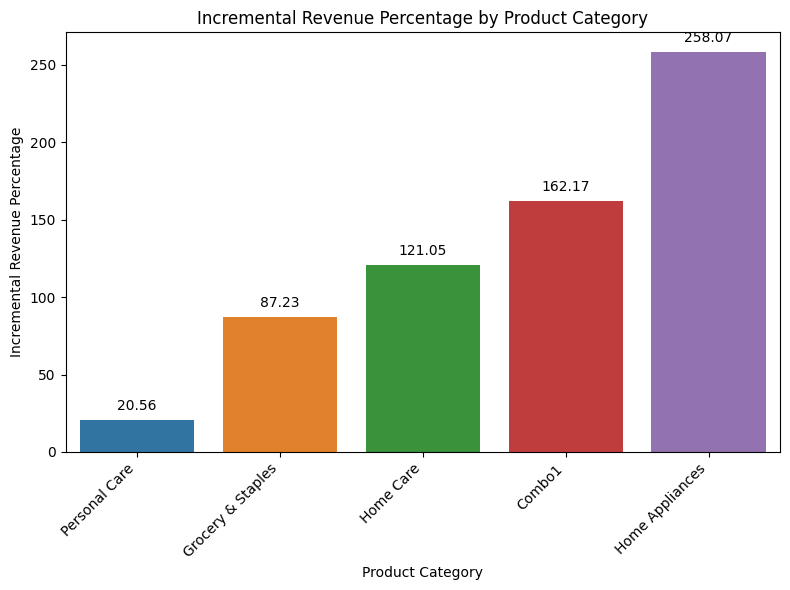

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate Incremental Revenue
df['revenue_before_promotion'] = df['base_price'] * df['quantity_sold(before_promo)']
df['revenue_after_promotion'] = df['base_price'] * df['quantity_sold(after_promo)']

# Calculate Incremental Revenue Percentage
df['incremental_revenue_percentage'] = ((df['revenue_after_promotion'] - df['revenue_before_promotion']) / df['revenue_before_promotion']) * 100


# Set the size of the figure
plt.figure(figsize=(8, 6))

# Plot the data
ax = sns.barplot(x='category', y='incremental_revenue_percentage', data=df, ci=None)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Set the labels and title
plt.xlabel('Product Category')
plt.ylabel('Incremental Revenue Percentage')
plt.title('Incremental Revenue Percentage by Product Category')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\j\AppData\Local\Temp\ipykernel_11136\4202230047.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(x='category', y='incremental_revenue_percentage', data=df, ci=None, palette=category_color_dict.values())
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will

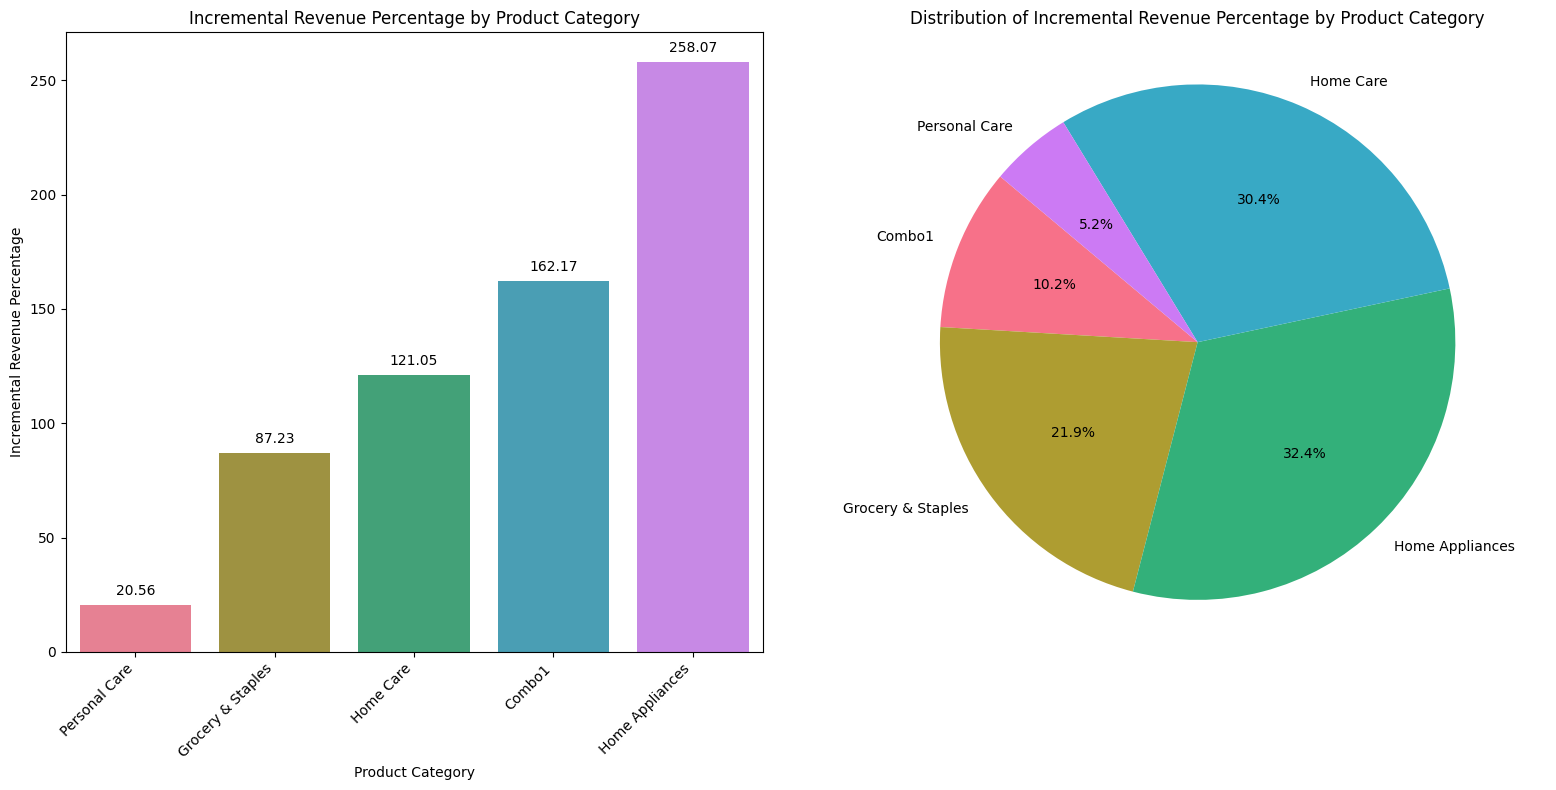

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Incremental Revenue
df['revenue_before_promotion'] = df['base_price'] * df['quantity_sold(before_promo)']
df['revenue_after_promotion'] = df['base_price'] * df['quantity_sold(after_promo)']

# Calculate Incremental Revenue Percentage
df['incremental_revenue_percentage'] = ((df['revenue_after_promotion'] - df['revenue_before_promotion']) / df['revenue_before_promotion']) * 100

# Define color palette
colors = sns.color_palette('husl', n_colors=len(df['category'].unique()))

# Create a dictionary to map each category to a color
category_color_dict = dict(zip(df['category'].unique(), colors))

# Set the size of the figure
plt.figure(figsize=(16, 8))

# Create the first subplot for the bar graph
plt.subplot(1, 2, 1)

# Plot the data
ax1 = sns.barplot(x='category', y='incremental_revenue_percentage', data=df, ci=None, palette=category_color_dict.values())

# Add labels to each bar
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

# Set the labels and title for the bar graph
plt.xlabel('Product Category')
plt.ylabel('Incremental Revenue Percentage')
plt.title('Incremental Revenue Percentage by Product Category')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Create the second subplot for the pie chart
plt.subplot(1, 2, 2)

# Calculate the sum of incremental revenue percentage for each category
category_revenue_sum = df.groupby('category')['incremental_revenue_percentage'].sum()

# Plot the pie chart
plt.pie(category_revenue_sum, labels=category_revenue_sum.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Incremental Revenue Percentage by Product Category')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Are there specific products that respond exceptionally well or poorly to promotions?

C:\Users\j\AppData\Local\Temp\ipykernel_11136\2164417631.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='incremental_revenue_percentage', y='product_name', data=combined_products, ci=None)
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a fut

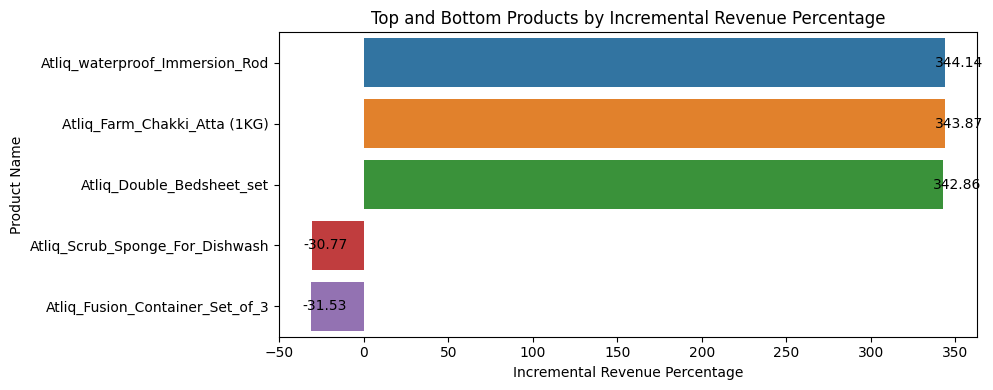

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for relevant columns
product_revenue_df = df[['product_name', 'incremental_revenue_percentage']]

# Sort the DataFrame by 'incremental_revenue_percentage'
product_revenue_df = product_revenue_df.sort_values(by='incremental_revenue_percentage', ascending=False)

# Extract top 3 and bottom 3 products
top_products = product_revenue_df.head(3)
bottom_products = product_revenue_df.tail(3)

# Combine top and bottom products
combined_products = pd.concat([top_products, bottom_products])

# Set the size of the figure
plt.figure(figsize=(10, 4))

# Plot the data
ax = sns.barplot(x='incremental_revenue_percentage', y='product_name', data=combined_products, ci=None)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'center', va = 'center', 
                xytext = (10, 0), 
                textcoords = 'offset points')

# Set the labels and title
plt.xlabel('Incremental Revenue Percentage')
plt.ylabel('Product Name')
plt.title('Top and Bottom Products by Incremental Revenue Percentage')

# Show the plot
plt.tight_layout()
plt.show()


### What is the correlation between product category and promotion type effectiveness?

In [20]:
import pandas as pd

# Create dummy variables for product category
category_dummies = pd.get_dummies(df['category'], prefix='category')

# Create dummy variables for promotion type
promotion_dummies = pd.get_dummies(df['promo_type'], prefix='promotion')

# Concatenate the dummy variables with the original DataFrame
df5 = pd.concat([category_dummies, promotion_dummies], axis=1)
category_dummies = category_dummies.replace({False: 0, True: 1})
promotion_dummies = promotion_dummies.replace({False: 0, True: 1})
df5 = df5.replace({False: 0, True: 1})
df5


,category_Combo1,category_Grocery & Staples,category_Home Appliances,category_Home Care,category_Personal Care,promotion_25% OFF,promotion_33% OFF,promotion_50% OFF,promotion_500 Cashback,promotion_BOGOF
0,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,1,0,0,1,0,0
1496,0,0,0,0,1,1,0,0,0,0
1497,0,0,0,0,1,0,0,1,0,0
1498,0,0,1,0,0,0,0,0,0,1


In [21]:
correlation_table = pd.DataFrame(index=promotion_dummies.columns, columns=category_dummies.columns)

# Calculate correlation for each combination of columns
for promo_column in promotion_dummies.columns:
    for cat_column in category_dummies.columns:
        correlation = promotion_dummies[promo_column].corr(category_dummies[cat_column])
        correlation_table.loc[promo_column, cat_column] = correlation

print("Correlation Table:")
correlation_table

Correlation Table:


,category_Combo1,category_Grocery & Staples,category_Home Appliances,category_Home Care,category_Personal Care
promotion_25% OFF,-0.161165,-0.022727,-0.236525,0.318182,-0.022727
promotion_33% OFF,-0.104828,0.650444,-0.153846,-0.236525,-0.236525
promotion_50% OFF,-0.133631,-0.301511,-0.196116,-0.301511,0.829156
promotion_500 Cashback,1.0,-0.161165,-0.104828,-0.161165,-0.161165
promotion_BOGOF,-0.188982,-0.1066,0.5547,0.213201,-0.426401


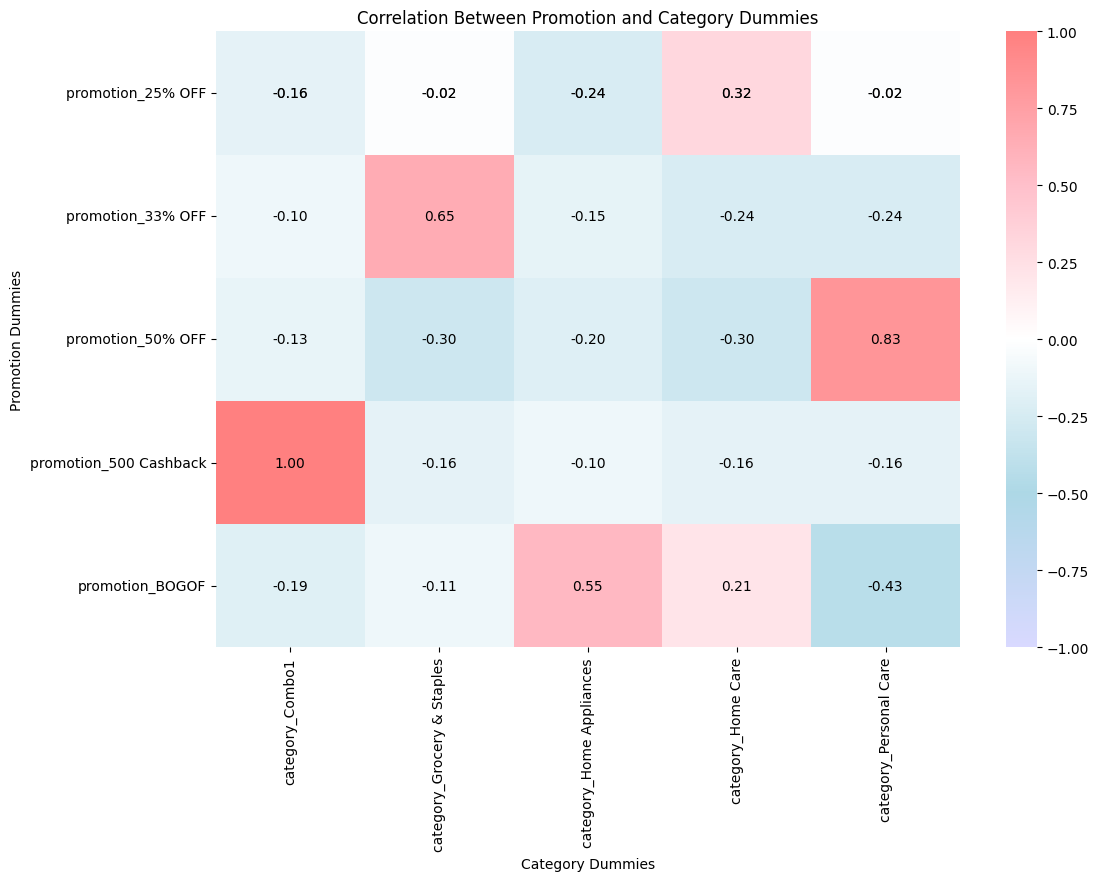

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Assuming you have already calculated the correlation_table DataFrame

# Convert the correlation values to numeric
correlation_table = correlation_table.apply(pd.to_numeric)

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Define a custom colormap
colors = [(0.85, 0.85, 1), 'lightblue', 'white', 'pink', (1, 0.5, 0.5)]
cmap = LinearSegmentedColormap.from_list('Custom', colors, N=256)

# Create the heatmap with the custom colormap
heatmap = sns.heatmap(correlation_table, annot=True, cmap=cmap, fmt=".2f",
                      vmin=-1, vmax=1, center=0)

# Loop through all the cells and add annotations
for i in range(len(correlation_table)):
    for j in range(len(correlation_table.columns)):
        heatmap.text(j + 0.5, i + 0.5, f"{correlation_table.iloc[i, j]:.2f}",
                     ha='center', va='center', color='black', fontsize=10)

# Set the title and labels
plt.title('Correlation Between Promotion and Category Dummies')
plt.xlabel('Category Dummies')
plt.ylabel('Promotion Dummies')

# Show the plot
plt.show()


##### Combo1: ______________"500 Cashback" promotion.
##### Grocery & Staples:____"33% OFF" promotion.
##### Home Appliances:______"BOGOF" (Buy One Get One Free) promotion.
##### Home Care:____________"Personal Care" promotion.
##### Personal Care:________"50% OFF" promotion.

In [24]:
file_path = r"D:\Excel Project\Pending Projects\C9_Input_Files\C9_Input_Files\dataset\final.csv"

# Save the DataFrame to a CSV file at the specified location
df.to_csv(file_path, index=False)  